# Calibration, Rectification, and Keypoints Detection

In [35]:
import cv2
from numpy import *
import numpy as np
import os

## Defining paths

In [36]:
path_L = "./basler_L_data_2022/" #L
path_R = "./basler_R_data_2022/" #R

calib_params = "./basler_calib_params_2022/"

## Reading the images and saving them into respective lists

In [43]:
'''READING IMAGES FROM FILE AND SORTING THEM'''
# listings_L = os.listdir(path_L)
# size_L = size(listings_L)
# listings_R = os.listdir(path_R)
# size_R = size(listings_R)

size_L = size(os.listdir(path_L))
size_R = size(os.listdir(path_R))

number_of_images = 0
if size_L == size_R:
    number_of_images = size_L
#endif

listings_L, listings_R = [], []
for i in range(0, number_of_images):
    listings_L.append(f'{i}_L_.png')
    listings_R.append(f'{i}_R_.png')
#endfor

print(size_L,size_R)
print(listings_L)
print()
print(listings_R)

43 43
['0_L_.png', '1_L_.png', '2_L_.png', '3_L_.png', '4_L_.png', '5_L_.png', '6_L_.png', '7_L_.png', '8_L_.png', '9_L_.png', '10_L_.png', '11_L_.png', '12_L_.png', '13_L_.png', '14_L_.png', '15_L_.png', '16_L_.png', '17_L_.png', '18_L_.png', '19_L_.png', '20_L_.png', '21_L_.png', '22_L_.png', '23_L_.png', '24_L_.png', '25_L_.png', '26_L_.png', '27_L_.png', '28_L_.png', '29_L_.png', '30_L_.png', '31_L_.png', '32_L_.png', '33_L_.png', '34_L_.png', '35_L_.png', '36_L_.png', '37_L_.png', '38_L_.png', '39_L_.png', '40_L_.png', '41_L_.png', '42_L_.png']

['0_R_.png', '1_R_.png', '2_R_.png', '3_R_.png', '4_R_.png', '5_R_.png', '6_R_.png', '7_R_.png', '8_R_.png', '9_R_.png', '10_R_.png', '11_R_.png', '12_R_.png', '13_R_.png', '14_R_.png', '15_R_.png', '16_R_.png', '17_R_.png', '18_R_.png', '19_R_.png', '20_R_.png', '21_R_.png', '22_R_.png', '23_R_.png', '24_R_.png', '25_R_.png', '26_R_.png', '27_R_.png', '28_R_.png', '29_R_.png', '30_R_.png', '31_R_.png', '32_R_.png', '33_R_.png', '34_R_.png

In [44]:
imgL_list = []
imgR_list = []

i = 0
while(i<size_L):
    imL = cv2.imread(path_L+listings_L[i], 0)
    imgL_list.append(imL)
    i+=1
#endwhile

i = 0
while(i<size_R):
    imR = cv2.imread(path_R+listings_R[i], 0)
    imgR_list.append(imR)
    i+=1
#endwhile

import random
temp = list(zip(imgL_list, imgR_list))
random.shuffle(temp)
imgL_list, imgR_list = zip(*temp)

## Detection of chessboard points
Reference -> https://stackoverflow.com/questions/37310210/camera-calibration-with-opencv-how-to-adjust-chessboard-square-size

In [45]:
'''CALIBRATING STARTS HERE'''
img_left_points = []
img_right_points = []
obj_points = []
size = size_L

h, w = 9, 6
pattern_size = (h,w)
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((w*h,3), np.float32)
objp[:,:2] = np.mgrid[0:h,0:w].T.reshape(-1,2)*26
print(objp)

[[  0.   0.   0.]
 [ 26.   0.   0.]
 [ 52.   0.   0.]
 [ 78.   0.   0.]
 [104.   0.   0.]
 [130.   0.   0.]
 [156.   0.   0.]
 [182.   0.   0.]
 [208.   0.   0.]
 [  0.  26.   0.]
 [ 26.  26.   0.]
 [ 52.  26.   0.]
 [ 78.  26.   0.]
 [104.  26.   0.]
 [130.  26.   0.]
 [156.  26.   0.]
 [182.  26.   0.]
 [208.  26.   0.]
 [  0.  52.   0.]
 [ 26.  52.   0.]
 [ 52.  52.   0.]
 [ 78.  52.   0.]
 [104.  52.   0.]
 [130.  52.   0.]
 [156.  52.   0.]
 [182.  52.   0.]
 [208.  52.   0.]
 [  0.  78.   0.]
 [ 26.  78.   0.]
 [ 52.  78.   0.]
 [ 78.  78.   0.]
 [104.  78.   0.]
 [130.  78.   0.]
 [156.  78.   0.]
 [182.  78.   0.]
 [208.  78.   0.]
 [  0. 104.   0.]
 [ 26. 104.   0.]
 [ 52. 104.   0.]
 [ 78. 104.   0.]
 [104. 104.   0.]
 [130. 104.   0.]
 [156. 104.   0.]
 [182. 104.   0.]
 [208. 104.   0.]
 [  0. 130.   0.]
 [ 26. 130.   0.]
 [ 52. 130.   0.]
 [ 78. 130.   0.]
 [104. 130.   0.]
 [130. 130.   0.]
 [156. 130.   0.]
 [182. 130.   0.]
 [208. 130.   0.]]


In [46]:
j=0
while(j<size):
    image_size = imgL_list[j].shape
    find_chessboard_flags = cv2.CALIB_CB_ADAPTIVE_THRESH | cv2.CALIB_CB_NORMALIZE_IMAGE | cv2.CALIB_CB_FAST_CHECK

    left_found, left_corners = cv2.findChessboardCorners(imgL_list[j], pattern_size, flags = find_chessboard_flags)
    right_found, right_corners = cv2.findChessboardCorners(imgR_list[j], pattern_size, flags = find_chessboard_flags)
 
    if left_found:
        cv2.cornerSubPix(imgL_list[j], left_corners, (11,11), (-1,-1), (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.1))
    if right_found:
        cv2.cornerSubPix(imgR_list[j], right_corners, (11,11), (-1,-1), (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.1))
 
    if left_found and right_found:
        img_left_points.append(left_corners)
        img_right_points.append(right_corners)
        obj_points.append(objp)

    #cv2.imshow("left", imgL_list[j])q 
    cv2.drawChessboardCorners(imgL_list[j], pattern_size, left_corners, left_found)
    cv2.drawChessboardCorners(imgR_list[j], pattern_size, right_corners, right_found)
    #cv2.waitKey(300)
    cv2.imshow("r chess", cv2.resize(imgR_list[j], (640,480)))
    cv2.imshow("l chess", cv2.resize(imgL_list[j], (640,480)))
    cv2.waitKey(500)
    j+=1
#endwhile
cv2.destroyAllWindows()

In [47]:
cv2.destroyAllWindows()

In [48]:
len(img_left_points)

43

In [49]:
imL.shape[:2]

(1200, 1600)

In [50]:
imL.shape[::-1]

(1600, 1200)

## Calibrating the cameras on the basis of chessboard points

In [51]:
# Determine the new values for different parameters
#   Right Side
retR, mtxR, distR, rvecsR, tvecsR = cv2.calibrateCamera(obj_points,
                                                        img_right_points,
                                                        imR.shape[::-1],None,None)
hR,wR = imR.shape[:2]
OmtxR, roiR= cv2.getOptimalNewCameraMatrix(mtxR,distR,
                                                   (wR,hR),1,(wR,hR))

#   Left Side
retL, mtxL, distL, rvecsL, tvecsL = cv2.calibrateCamera(obj_points,
                                                        img_left_points,
                                                        imL.shape[::-1],None,None)
hL,wL = imL.shape[:2]
OmtxL, roiL = cv2.getOptimalNewCameraMatrix(mtxL,distL,(wL,hL),1,(wL,hL))

print('Cameras Ready to use')

Cameras Ready to use


In [52]:
print('mean reprojection error - right: ', retR)
print('mean reprojection error - left: ', retL)

print("roiR: ", roiR)
print("roiL: ", roiL)

mean reprojection error - right:  0.45322425115772574
mean reprojection error - left:  0.40712146938205357
roiR:  (457, 662, 287, 310)
roiL:  (202, 173, 608, 555)


In [53]:
img = imR.copy()
# using cv2.undistort
dst = cv2.undistort(img, mtxR, distR, None, OmtxR)
x,y,w,h = roiR
dst = dst[y:y+h, x:x+w]

# using remapping
right_map = cv2.initUndistortRectifyMap(mtxR, distR, None, OmtxR, img.shape[::-1], cv2.CV_16SC2)
rdst = cv2.remap(img,right_map[0],right_map[1], cv2.INTER_LANCZOS4, cv2.BORDER_CONSTANT, 0)
x,y,w,h = roiR
rdst = rdst[y:y+h, x:x+w]

cv2.imshow('undist', cv2.resize(dst, (640,480)))
cv2.imshow('rundist', cv2.resize(rdst, (640,480)))
cv2.imshow('img', cv2.resize(img, (640,480)))
cv2.waitKey(0)
cv2.destroyAllWindows()

#cv2.imwrite('./undist.png', dst)
#cv2.imwrite('./rundist.png', rdst)
#cv2.imwrite('./img.png', img)

In [54]:
cv2.destroyAllWindows()

In [55]:
print(roiR)
print(roiL)

(457, 662, 287, 310)
(202, 173, 608, 555)


In [56]:
formatm = [["fx","0","cx"],["0","fy","cy"],["0","0","1"]]
print('\n format -> \n',formatm)
print('\n mtxR -> \n',mtxR,2*'\n','OmtxR -> \n',OmtxR,2*'\n','mtxL -> \n',mtxL,2*'\n','OmtxL -> \n',OmtxL)


 format -> 
 [['fx', '0', 'cx'], ['0', 'fy', 'cy'], ['0', '0', '1']]

 mtxR -> 
 [[852.72379538   0.         797.39789994]
 [  0.         852.89699326 609.20074665]
 [  0.           0.           1.        ]] 

 OmtxR -> 
 [[153.00378418   0.         600.43956499]
 [  0.         220.58779907 819.73951582]
 [  0.           0.           1.        ]] 

 mtxL -> 
 [[862.70758056   0.         819.56577639]
 [  0.         863.17817609 603.25866312]
 [  0.           0.           1.        ]] 

 OmtxL -> 
 [[327.65176392   0.         513.70342583]
 [  0.         399.54489136 452.50442428]
 [  0.           0.           1.        ]]


In [57]:
# Termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
criteria_stereo = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# StereoCalibrate function
'''
flags = 0
flags |= cv2.CALIB_FIX_INTRINSIC
flags |= cv2.CALIB_FIX_PRINCIPAL_POINT
flags |= cv2.CALIB_USE_INTRINSIC_GUESS
flags |= cv2.CALIB_FIX_FOCAL_LENGTH
flags |= cv2.CALIB_FIX_ASPECT_RATIO
flags |= cv2.CALIB_ZERO_TANGENT_DIST
flags |= cv2.CALIB_RATIONAL_MODEL
flags |= cv2.CALIB_SAME_FOCAL_LENGTH
flags |= cv2.CALIB_FIX_K3
flags |= cv2.CALIB_FIX_K4
flags |= cv2.CALIB_FIX_K5
'''
flags = cv2.CALIB_FIX_ASPECT_RATIO | cv2.CALIB_ZERO_TANGENT_DIST | cv2.CALIB_SAME_FOCAL_LENGTH | cv2.CALIB_RATIONAL_MODEL | cv2.CALIB_FIX_K3 | cv2.CALIB_FIX_K4 | cv2.CALIB_FIX_K5
#flags = cv2.CALIB_FIX_INTRINSIC
retS, MLS, dLS, MRS, dRS, R, T, E, F = cv2.stereoCalibrate(obj_points,
                                                          img_left_points,
                                                          img_right_points,
                                                          mtxL,
                                                          distL,
                                                          mtxR,
                                                          distR,
                                                          imR.shape[::-1],
                                                          criteria_stereo,
                                                          flags)


In [58]:
print('mean reprojection error: ', retS)
print(' MRS -> ',MRS,2*'\n','mtxR -> ',mtxR,2*'\n','MLS -> ',MLS,2*'\n','mtxL -> ',mtxL)

mean reprojection error:  0.6422394584897069
 MRS ->  [[852.72379538   0.         797.39789994]
 [  0.         852.89699326 609.20074665]
 [  0.           0.           1.        ]] 

 mtxR ->  [[852.72379538   0.         797.39789994]
 [  0.         852.89699326 609.20074665]
 [  0.           0.           1.        ]] 

 MLS ->  [[862.70758056   0.         819.56577639]
 [  0.         863.17817609 603.25866312]
 [  0.           0.           1.        ]] 

 mtxL ->  [[862.70758056   0.         819.56577639]
 [  0.         863.17817609 603.25866312]
 [  0.           0.           1.        ]]


In [59]:
print(' Rotational -> \n',R,2*'\n','Translational -> \n',T,2*'\n','Essential -> \n',E,2*'\n','Fundamental -> \n',F)
# Rotational Translational Essential Fundamental

 Rotational -> 
 [[ 0.99968782  0.00168711  0.02492814]
 [-0.00104951  0.99967252 -0.02556851]
 [-0.02496311  0.02553436  0.99936222]] 

 Translational -> 
 [[318.94495549]
 [  1.25709046]
 [-13.46057448]] 

 Essential -> 
 [[-4.55079133e-02  1.34882654e+01  9.12121921e-01]
 [-5.49451423e+00 -8.16676565e+00 -3.19077085e+02]
 [-1.59143437e+00  3.18838387e+02 -8.18628323e+00]] 

 Fundamental -> 
 [[ 4.18001380e-08 -1.23825491e-05  6.71284011e-03]
 [ 5.04582164e-06  7.49576303e-06  2.44133858e-01]
 [-1.86076221e-03 -2.44285916e-01  1.00000000e+00]]


In [60]:
np.save(calib_params+'R.npy', R)
np.save(calib_params+'T.npy', T)
np.save(calib_params+'E.npy', E)
np.save(calib_params+'F.npy', F)

np.save(calib_params+'MLS.npy', MLS)
np.save(calib_params+'dLS.npy', dLS)
np.save(calib_params+'MRS.npy', MRS)
np.save(calib_params+'dRS.npy', dRS)

## Rectifying params through which captured images can be rectified accordingly

In [61]:
# StereoRectify function
rectify_scale = 1# if 0 image croped, if 1 image nor croped
RL, RR, PL, PR, Q, roiL, roiR = cv2.stereoRectify(MLS, dLS, MRS, dRS,
                                                 imR.shape[::-1], R, T,
                                                 rectify_scale) # last paramater is alpha, if 0= croped, if 1= not croped
# initUndistortRectifyMap function
Left_Stereo_Map = cv2.initUndistortRectifyMap(MLS, dLS, RL, PL,
                                             imR.shape[::-1], cv2.CV_16SC2)   # cv2.CV_16SC2 this format enables us the programme to work faster
Right_Stereo_Map = cv2.initUndistortRectifyMap(MRS, dRS, RR, PR,
                                              imR.shape[::-1], cv2.CV_16SC2)
#*******************************************
#***** Parameters for the StereoVision *****
#*******************************************

In [62]:
np.save(calib_params+'RL.npy', RL)
np.save(calib_params+'RR.npy', RR)
np.save(calib_params+'PL.npy', PL)
np.save(calib_params+'PR.npy', PR)

np.save(calib_params+'Q.npy', Q)

In [63]:
print(roiR)
print(roiL)

(0, 30, 1589, 1162)
(23, 0, 1577, 1171)


In [64]:
Q

array([[ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -8.56367241e+02],
       [ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
        -6.06024956e+02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         8.58037585e+02],
       [ 0.00000000e+00,  0.00000000e+00, -3.13252447e-03,
         0.00000000e+00]])

## Reading the images to get them rectified

In [79]:
pic_num = '31'
rect_path = "./basler_rect_2022/"
frameL = cv2.imread(path_L+pic_num+'_L_.png')
frameR = cv2.imread(path_R+pic_num+'_R_.png')

Left_nice = cv2.remap(frameL,Left_Stereo_Map[0],Left_Stereo_Map[1], cv2.INTER_LANCZOS4, cv2.BORDER_CONSTANT, 0)  # Rectify the image using the kalibration parameters founds during the initialisation
Right_nice = cv2.remap(frameR,Right_Stereo_Map[0],Right_Stereo_Map[1], cv2.INTER_LANCZOS4, cv2.BORDER_CONSTANT, 0)

In [80]:
def draw_lines(img):
    y,count = 0,0
    while(count<40):
        img = cv2.line(img, (0,50+y), (img.shape[1],50+y), (y,count*2,y), 2)
        y+=30
        count+=1
    #endwhile
    return cv2.resize(img, (640,480))
#enddef

chairL = frameL.copy()
chairR = frameR.copy()

xr,yr,wr,hr = roiR
xl,yl,wl,hl = roiL

#Right_nice = Right_nice[yl:yl+hr, xr:xr+wr]
#Left_nice = Left_nice[yl:yl+hr, xl:xl+wl]

right_img_remap_copy = Right_nice.copy()
left_img_remap_copy = Left_nice.copy()
'''
y,count = 0,0
while(count<40):
    chairR = cv2.line(chairR, (0,50+y), (1280,50+y), (0,count*2,y), 2)
    chairL = cv2.line(chairL, (0,50+y), (1280,50+y), (0,count*2,y), 2)
    right_img_remap_copy = cv2.line(right_img_remap_copy, (0,50+y), (1280,50+y), (0,count*2,y), 2)
    left_img_remap_copy = cv2.line(left_img_remap_copy, (0,50+y), (1280,50+y), (0,count*2,y), 2)
    y+=30
    count+=1
'''   
cv2.imshow('R', draw_lines(chairR))
cv2.imshow('L', draw_lines(chairL))
cv2.imshow('R rect', draw_lines(right_img_remap_copy))
cv2.imshow('L rect', draw_lines(left_img_remap_copy))
cv2.waitKey(0)

origLR = np.concatenate((chairL, chairR), axis=1)
cv2.imwrite(rect_path+pic_num+'_orig.png', origLR)
rectLR = np.concatenate((left_img_remap_copy, right_img_remap_copy), axis=1)
cv2.imwrite(rect_path+pic_num+'_rect.png', rectLR)
cv2.destroyAllWindows()

In [78]:
cv2.destroyAllWindows()

## Depth Map using WLS Filtering

In [68]:
grayR = cv2.cvtColor(Right_nice,cv2.COLOR_BGR2GRAY)
grayL = cv2.cvtColor(Left_nice,cv2.COLOR_BGR2GRAY)

# Create StereoSGBM and prepare all parameters
window_size = 7
min_disp = 1
num_disp = (16*16)+1-min_disp
left_matcher = cv2.StereoSGBM_create(minDisparity = min_disp,
    numDisparities = num_disp,
    blockSize = window_size,
    uniquenessRatio = 10,
    speckleWindowSize = 100,
    speckleRange = 32,
    disp12MaxDiff = 5,
    P1 = 8*3*window_size**2,
    P2 = 32*3*window_size**2)

# Used for the filtered image
right_matcher = cv2.ximgproc.createRightMatcher(left_matcher) # Create another stereo for right this time

# WLS FILTER Parameters
lmbda = 80000
sigma = 1.8
visual_multiplier = 1.0
 
wls_filter = cv2.ximgproc.createDisparityWLSFilter(matcher_left=left_matcher)
wls_filter.setLambda(lmbda)
wls_filter.setSigmaColor(sigma)

dispL = left_matcher.compute(grayL,grayR)
dispR = right_matcher.compute(grayR,grayL)
dispL = np.int16(dispL)
dispR = np.int16(dispR)

filteredImg = wls_filter.filter(dispL, grayL, None, dispR)  # important to put "imgL" here!!!
filteredImg = cv2.normalize(src=filteredImg, dst=filteredImg, beta=0, alpha=255, norm_type=cv2.NORM_MINMAX);
filteredImg = np.uint8(filteredImg)

fil = cv2.resize(filteredImg, (1920,1080))
#cv2.imshow('filteredImg',fil)
#cv2.waitKey(0)
cv2.destroyAllWindows()
plt.imshow(cv2.cvtColor(fil, cv2.COLOR_GRAY2RGB))
plt.show()

NameError: name 'plt' is not defined

In [69]:
cv2.destroyAllWindows()

In [70]:
print(Left_nice.shape, Right_nice.shape)

(1200, 1600, 3) (1200, 1600, 3)


## Impixelinfo

<IPython.core.display.Javascript object>


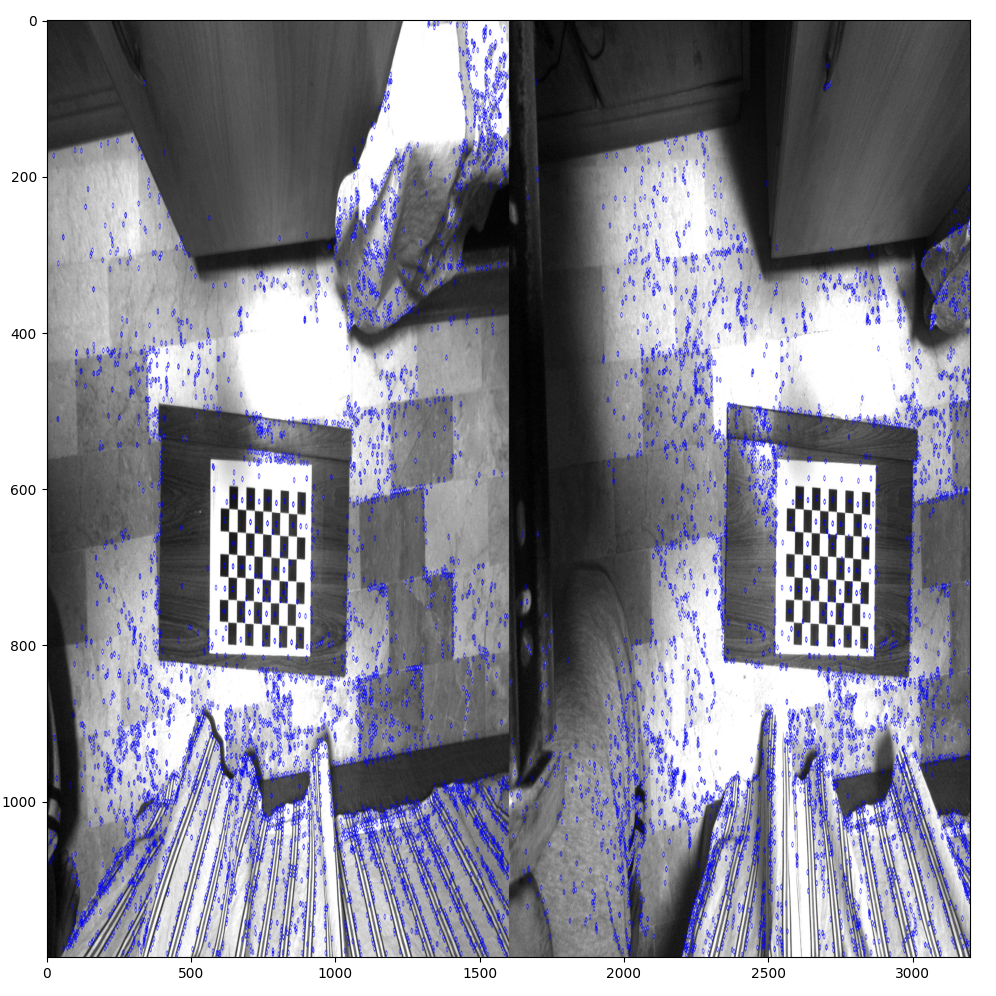

In [71]:
%matplotlib notebook
import matplotlib
import matplotlib.pyplot as plt

imgs = []
imgs.append(cv2.cvtColor(frameL, cv2.COLOR_BGR2RGB))
imgs.append(cv2.cvtColor(frameR, cv2.COLOR_BGR2RGB))
imgs.append(cv2.cvtColor(Left_nice, cv2.COLOR_BGR2RGB))
imgs.append(cv2.cvtColor(Right_nice, cv2.COLOR_BGR2RGB))

row,col = 2,2
f, axarr = plt.subplots(row,col,figsize=(10,10))
f.tight_layout()

axarr[0,0].imshow(imgs[0]),axarr[0,0].set_title('frameL', color='r', size=15), axarr[0,0].axis('off')
axarr[0,1].imshow(imgs[1]),axarr[0,1].set_title('frameR', color='r', size=15), axarr[0,1].axis('off')

axarr[1,0].imshow(imgs[2]),axarr[1,0].set_title('rectL', color='r', size=15), axarr[1,0].axis('off')
axarr[1,1].imshow(imgs[3]),axarr[1,1].set_title('rectR', color='r', size=15), axarr[1,1].axis('off')

plt.show()

## Calculating disparity

In [72]:
cv2.namedWindow('disparity_con')
con = np.zeros((500,500,3), np.uint8)

def nothing(x):
    pass

numDisp = 1
highDisp = 30

bS = 1
highBS = 127

# creating trackbars
cv2.createTrackbar('disp', 'disparity_con', numDisp, highDisp, nothing)
cv2.createTrackbar('block', 'disparity_con', bS, highBS, nothing)

while(True):
    # get the trackbar positions and set them to l_h, l_s, l_v respectively
    numDisp = cv2.getTrackbarPos('disp', 'disparity_con')
    bS = cv2.getTrackbarPos('block', 'disparity_con')
    if numDisp == 0:
        numDisp = 1
    if bS == 0:
        bS = 1
    #endif
    cv2.putText(con, 'Disp: '+str(numDisp*16), (150,40),2,1,(255,255,255),1,0)
    cv2.putText(con, 'Block: '+str(2*(bS)+1), (150,70),2,1,(255,255,255),1,0)
    
    stereo = cv2.StereoSGBM_create(1, 16*numDisp, 2*(bS)+1)
    disparity = stereo.compute(Left_nice, Right_nice)
    #disparity = ((disparity.astype(np.float32)/ 16)-1)/numDisp
    #disparity = stereo.compute(origR, origL).astype(np.float32)

    norm_coeff = 255 / disparity.max()
    cv2.imshow("disparity", disparity * norm_coeff / 255)
    #cv2.imshow('disparity', disparity)
    cv2.imshow('disparity_con', con)
    
    con = np.zeros((500,500,3), np.uint8)
    if cv2.waitKey(1) & 0xff == ord('q'):
        break

cv2.destroyAllWindows()
plt.imshow(disparity,'gray')
plt.show()

In [73]:
cv2.destroyAllWindows()

## Keypoints Detection

In [75]:
imgL = Left_nice.copy()
imgR = Right_nice.copy()
out_image = None

# Initiate FAST object with default values
fast = cv2.FastFeatureDetector_create() 
sift = cv2.xfeatures2d.SIFT_create()
# find and draw the keypoints
kpL = sift.detect(imgL, None)
img2L = cv2.drawKeypoints(imgL, kpL, out_image, color=(255,0,0))
kpR = sift.detect(imgR, None)
img2R = cv2.drawKeypoints(imgR, kpR, out_image, color=(255,0,0))

#cv2.imshow('kpL', img2L)
#cv2.imshow('kpR', img2R)
#hor = np.hstack((img2L, img2R))
vis = np.concatenate((img2L, img2R), axis=1)
#cv2.imshow('mkp', vis)
#cv2.imwrite('kp.png', vis)
#cv2.waitKey(0)
#cv2.destroyAllWindows()
print(vis.shape)
plt.clf()
plt.imshow(cv2.cvtColor(vis, cv2.COLOR_BGR2RGB), aspect='auto')
plt.show()

(1200, 3200, 3)


In [ ]:
cv2.destroyAllWindows()

In [ ]:
disparity

## Point cloud -> *problematic*

In [ ]:
ply_header = '''ply
format ascii 1.0
element vertex %(vert_num)d
property float x
property float y
property float z
property uchar red
property uchar green
property uchar blue
end_header
'''

def write_ply(fn, verts, colors):
    verts = verts.reshape(-1, 3)
    colors = colors.reshape(-1, 3)
    verts = np.hstack([verts, colors])
    with open(fn, 'wb') as f:
        f.write((ply_header % dict(vert_num=len(verts))).encode('utf-8'))
        np.savetxt(f, verts, fmt='%f %f %f %d %d %d ')
#enddef

disparity = filteredImg.copy()
points = cv2.reprojectImageTo3D(disparity, Q)
colors = cv2.cvtColor(Left_nice, cv2.COLOR_BGR2RGB)
#colors = left_img_remap
mask = disparity > disparity.min()
out_points = points[mask]
out_colors = colors[mask]

#cv2.imshow('left', left_img_remap)
#cv2.imshow('right', right_img_remap)
cv2.imshow('disparity', disparity)
cv2.waitKey(0)
out_fn = 'out_new.ply'
write_ply('out_new.ply', out_points, out_colors)
print('%s saved' % 'out_new.ply')

In [ ]:
cv2.destroyAllWindows()

In [ ]:
disparity.min()

In [ ]:
points

## Testing in real time

#### For Basler cams

In [35]:
from pypylon import pylon
import cv2
import numpy as np

# Pypylon get camera by serial number
serial_number_1 = '22730679' #right
serial_number_2 = '22730681' #left
cams = []

for i in pylon.TlFactory.GetInstance().EnumerateDevices():
    cams.append(i)
#next

print(cams[0].GetSerialNumber(), cams[1].GetSerialNumber())
camera_1 = pylon.InstantCamera(pylon.TlFactory.GetInstance().CreateDevice(cams[0]))
camera_2 = pylon.InstantCamera(pylon.TlFactory.GetInstance().CreateDevice(cams[1]))
camera_1.Open()
camera_2.Open()

# Grabing Continusely (video) with minimal delay
camera_1.StartGrabbing(pylon.GrabStrategy_LatestImageOnly) 
camera_2.StartGrabbing(pylon.GrabStrategy_LatestImageOnly) 
converter = pylon.ImageFormatConverter()

# converting to opencv bgr format
converter.OutputPixelFormat = pylon.PixelType_BGR8packed
converter.OutputBitAlignment = pylon.OutputBitAlignment_MsbAligned

while camera_1.IsGrabbing() and camera_2.IsGrabbing():
    grabResult_1 = camera_1.RetrieveResult(5000, pylon.TimeoutHandling_ThrowException)
    grabResult_2 = camera_2.RetrieveResult(5000, pylon.TimeoutHandling_ThrowException)

    if grabResult_1.GrabSucceeded() and grabResult_2.GrabSucceeded():
        # Access the image data
        image_1 = converter.Convert(grabResult_1) #right
        image_2 = converter.Convert(grabResult_2) #left

        frame1 = image_1.GetArray()
        frame2 = image_2.GetArray()

        frame1_gray = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
        frame2_gray = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)

        vid_right_nice = cv2.remap(frame1,Right_Stereo_Map[0],Right_Stereo_Map[1], cv2.INTER_LANCZOS4, cv2.BORDER_CONSTANT, 0)
        vid_left_nice = cv2.remap(frame2,Left_Stereo_Map[0],Left_Stereo_Map[1], cv2.INTER_LANCZOS4, cv2.BORDER_CONSTANT, 0)
        
        chairL = frame1_gray.copy()
        chairR = frame2_gray.copy()
        vid_right_nice_copy = vid_right_nice.copy()
        vid_left_nice_copy = vid_left_nice.copy()

        y,count = 0,0
        while(count<40):
            chairR = cv2.line(chairR, (0,50+y), (1920,50+y), (0,count*2,y), 2)
            chairL = cv2.line(chairL, (0,50+y), (1920,50+y), (0,count*2,y), 2)
            vid_right_nice_copy = cv2.line(vid_right_nice_copy, (0,50+y), (1920,50+y), (0,count*2,y), 2)
            vid_left_nice_copy = cv2.line(vid_left_nice_copy, (0,50+y), (1920,50+y), (0,count*2,y), 2)
            y+=30
            count+=1
        #endwhile

        cv2.imshow('right', cv2.resize(chairR, (640,480)))
        cv2.imshow('left', cv2.resize(chairL, (640,480)))

        cv2.imshow('right_nice', cv2.resize(vid_right_nice_copy, (640,480)))
        cv2.imshow('left_nice', cv2.resize(vid_left_nice_copy, (640,480)))

        # saving images into the respective folders
        if cv2.waitKey(1) & 0xff == ord('q'):
            break
        #endif
    #endif
    grabResult_1.Release()
    grabResult_2.Release()
#endwhile
    
# Releasing the resource    
camera_1.StopGrabbing()
camera_2.StopGrabbing()

cv2.destroyAllWindows()

22730679 22730681
